In [3]:
import numpy as np 
from sklearn import  datasets
import matplotlib.pyplot as plt

设有m条n维数据

1）把原始数据按列组成n行m列矩阵X

2）将X的每一行（代表一个属性字段）进行零均值化，即减去这一行的均值

3）求出协方差矩阵$$C=\frac{1}{m}XX^𝖳$$

4）求出协方差矩阵的特征值及对应的特征向量

5）将特征向量按对应特征值大小从上到下按行排列成矩阵，取前k行组成矩阵P

6)$$Y = PX $$即为降维到k维后的数据


In [4]:
a= np.array([[1,1],[1,3],[2,3],[4,4],[2,4]])
a.shape 

(5, 2)

In [5]:
a = a - a.mean(axis=0)
a 

array([[-1., -2.],
       [-1.,  0.],
       [ 0.,  0.],
       [ 2.,  1.],
       [ 0.,  1.]])

In [6]:
C = np.dot(a.T,a)/a.shape[0]
C 

array([[1.2, 0.8],
       [0.8, 1.2]])

In [7]:
eig_val, eig_vec = np.linalg.eig(C)
eig_val,eig_vec

(array([2. , 0.4]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [8]:
P = eig_vec[:,0]

In [9]:
out = np.dot(P,a.T)

In [23]:
out 

array([-2.12132034, -0.70710678,  0.        ,  2.12132034,  0.70710678])

In [10]:
def PCA(X,k):
    """
    input：
        X：原数据，np.array类型，shape=(n,m),n为样本数目，m为维度
        k：降低到多少维
    output:
        Y：降维后的数据，shape=(n,k)
    """
    number = X.shape[0]
    dimension = X.shape[1]
    X = X - X.mean(axis=0)
    C = np.dot(X.T,X)/number
    
    eig_val,eig_vec = np.linalg.eig(C)
    
    eig_List = [(np.abs(eig_val[i]),eig_vec[:,i]) for i in range(dimension)]
    eig_List.sort(reverse=True)
    P = np.array([each_List[1] for each_List in eig_List[:k]])
    Y = np.dot(X,P.T)
    return Y

In [64]:
X = datasets.load_iris().data 

In [11]:
PCA(a,1)

array([[-2.12132034],
       [-0.70710678],
       [ 0.        ],
       [ 2.12132034],
       [ 0.70710678]])

In [65]:
X_trans = PCA(X,2)
X_trans.shape 

TypeError: 'axis' is an invalid keyword argument for sort()

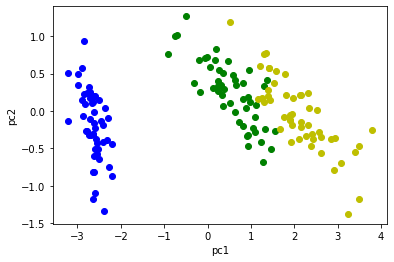

In [61]:
x1 = X_trans[:, 0]
x2 = X_trans[:, 1]
#绘图
plt.scatter(x1[:50], x2[:50], c='b')
plt.scatter(x1[50:100], x2[50:100], c='g')
plt.scatter(x1[100:150], x2[100:150], c='y')
#plt.legend()
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

In [14]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [15]:
pca = PCA(n_components=1).fit(a).transform(a)
pca 

array([[ 2.12132034],
       [ 0.70710678],
       [ 0.        ],
       [-2.12132034],
       [-0.70710678]])

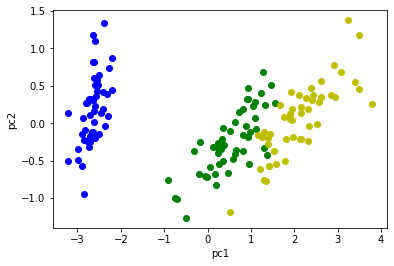

In [16]:
X = datasets.load_iris().data 
X_trans = PCA(n_components=2).fit(X).transform(X)
x1 = X_trans[:, 0]
x2 = X_trans[:, 1]
#绘图
plt.scatter(x1[:50], x2[:50], c='b')
plt.scatter(x1[50:100], x2[50:100], c='g')
plt.scatter(x1[100:150], x2[100:150], c='y')
#plt.legend()
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()